# <center> Cosine Similarity </center> 

In [1]:
from datasets import load_dataset

wiki_embeddings = load_dataset('cayjobla/wikipedia_embedded', split='train')
wiki_embeddings.set_format(type='torch', columns=['data'])

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/41 [00:00<?, ?it/s]

In [2]:
wiki_embeddings

Dataset({
    features: ['data'],
    num_rows: 6458670
})

In [3]:
# Get pairs of random samples
num_samples = 100_000
wiki_embeddings = wiki_embeddings.select(range(2*num_samples))
wiki_embeddings = wiki_embeddings.shuffle(seed=916)
sample1 = wiki_embeddings['data'][:num_samples]
sample2 = wiki_embeddings['data'][num_samples:2*num_samples]

In [4]:
from torch.nn.functional import cosine_similarity
import matplotlib.pyplot as plt

def plot_distribution(dist, ax=None, density_color='blue', mean_color='red', alpha=0.7):
    if ax is None:
        fig, ax = plt.subplots()
    ax.hist(dist.numpy(), bins=100, color=density_color, alpha=alpha, density=True)
    ax.axvline(dist.mean().item(), color=mean_color, linestyle='dashed', linewidth=1)
    return ax

def plot_similarity_distribution(sample1, sample2):
    distribution = cosine_similarity(sample1, sample2, dim=1)
    ax = plot_distribution(distribution)
    ax.set_title('Cosine Similarity Distribution')
    ax.set_xlabel('Cosine similarity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(-1, 1)
    return distribution


# 768 dimensions (full size)

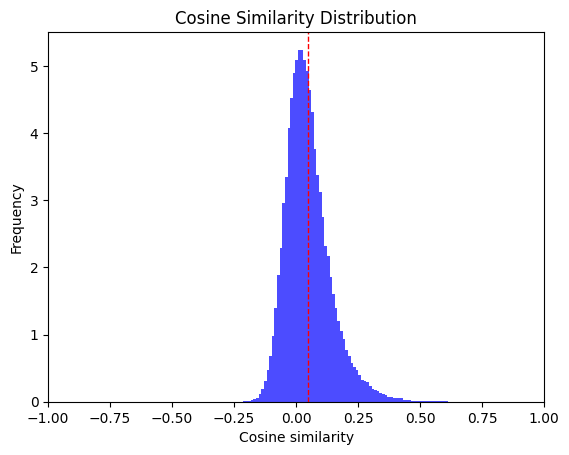

In [5]:
full_dist = plot_similarity_distribution(sample1, sample2)

## 48 dimensions (BertReducedModel)

Note that the wikipedia sentence embeddings were done by an MPNet model, not a BERT model, so this distribution may not actually be informative

In [6]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda')

In [7]:
from reduced_encoders import BertReducedModel

reduce = BertReducedModel.from_pretrained('cayjobla/bert-base-uncased-reduced').reduce
reduce.to(device)

/home/cayjobla/miniconda3/envs/reduced_encoders/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


DimReduce(
  (0): DimReshape(
    (linear): Linear(in_features=768, out_features=512, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (1): DimReshape(
    (linear): Linear(in_features=512, out_features=256, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (2): DimReshape(
    (linear): Linear(in_features=256, out_features=128, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (3): DimReshape(
    (linear): Linear(in_features=128, out_features=64, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (4): DimReshape(
    (linear): Linear(in_features=64, out_features=48, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [8]:
sample1 = sample1.to(device)
reduced_sample1 = reduce(sample1).detach().cpu()
sample1 = sample1.cpu()

sample2 = sample2.to(device)
reduced_sample2 = reduce(sample2).detach().cpu()
sample2 = sample2.cpu()

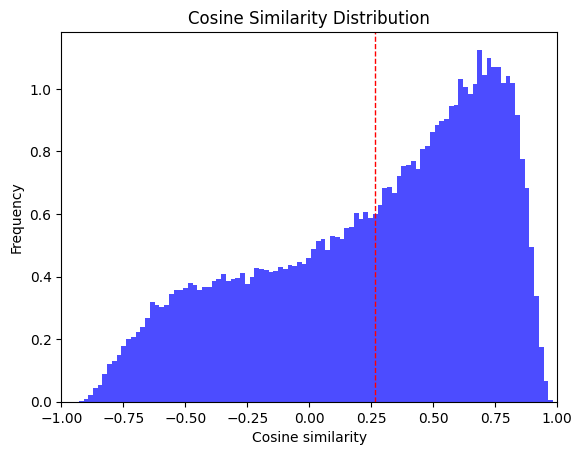

In [9]:
reduced_bert_dist = plot_similarity_distribution(reduced_sample1, reduced_sample2)

## 48 dimensions (MPNetReduced)

In [10]:
from reduced_encoders import MPNetReducedModel

reduce = MPNetReducedModel.from_pretrained('cayjobla/all-mpnet-base-v2-reduced').reduce
reduce.to(device)

DimReduce(
  (0): DimReshape(
    (linear): Linear(in_features=768, out_features=512, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (1): DimReshape(
    (linear): Linear(in_features=512, out_features=256, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (2): DimReshape(
    (linear): Linear(in_features=256, out_features=128, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (3): DimReshape(
    (linear): Linear(in_features=128, out_features=64, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (4): DimReshape(
    (linear): Linear(in_features=64, out_features=48, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [11]:
sample1 = sample1.to(device)
reduced_sample1 = reduce(sample1).detach().cpu()
sample1 = sample1.cpu()

sample2 = sample2.to(device)
reduced_sample2 = reduce(sample2).detach().cpu()
sample2 = sample2.cpu()

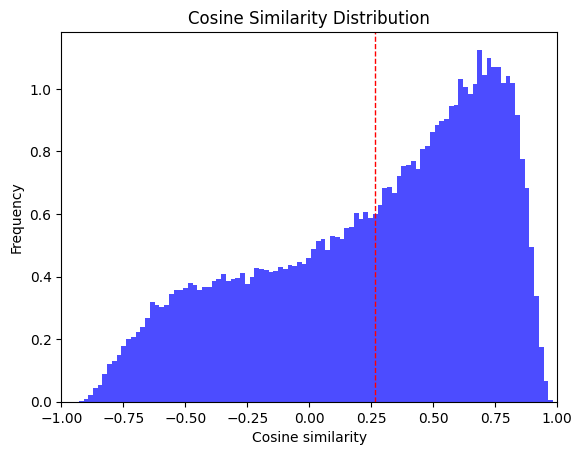

In [12]:
reduced_mpnet_dist = plot_similarity_distribution(reduced_sample1, reduced_sample2)

This is consistent with the ReducedBert model

## 48 dimensions (MPNetCompressed)

Now we can look at what the cosine similarities look like on a model that was trained on them

In [13]:
from reduced_encoders import MPNetCompressedModel

reduce = MPNetCompressedModel.from_pretrained('cayjobla/all-mpnet-base-v2-compressed').reduce
reduce.to(device)

DimReduce(
  (0): DimReshape(
    (linear): Linear(in_features=768, out_features=512, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (1): DimReshape(
    (linear): Linear(in_features=512, out_features=256, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (2): DimReshape(
    (linear): Linear(in_features=256, out_features=128, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (3): DimReshape(
    (linear): Linear(in_features=128, out_features=64, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (4): DimReshape(
    (linear): Linear(in_features=64, out_features=48, bias=True)
    (activation): GELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [14]:
sample1 = sample1.to(device)
reduced_sample1 = reduce(sample1).detach().cpu()
sample1 = sample1.cpu()

sample2 = sample2.to(device)
reduced_sample2 = reduce(sample2).detach().cpu()
sample2 = sample2.cpu()

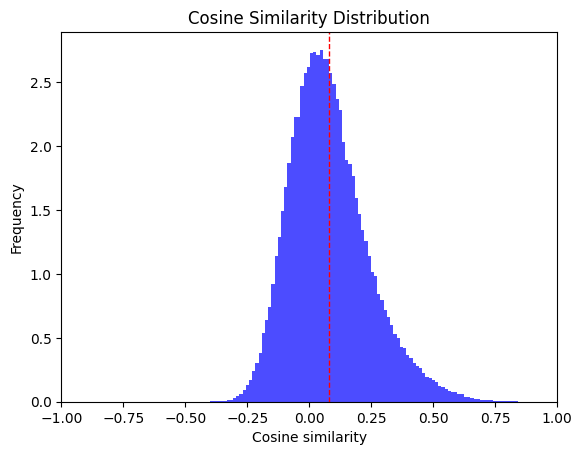

In [15]:
compressed_mpnet_dist = plot_similarity_distribution(reduced_sample1, reduced_sample2)

## Comparison

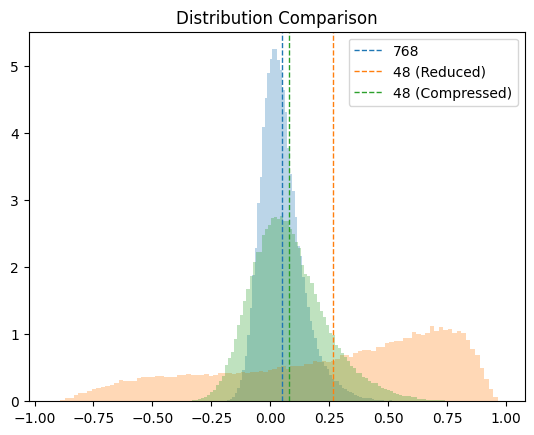

In [16]:
ax = plot_distribution(full_dist, density_color="C0", mean_color="C0", alpha=0.3)
ax = plot_distribution(reduced_mpnet_dist, density_color="C1", mean_color="C1", alpha=0.3, ax=ax)
ax = plot_distribution(compressed_mpnet_dist, density_color="C2", mean_color="C2", alpha=0.3, ax=ax)
ax.legend(["768", "48 (Reduced)", "48 (Compressed)"])
ax.set_title("Distribution Comparison")
plt.show()

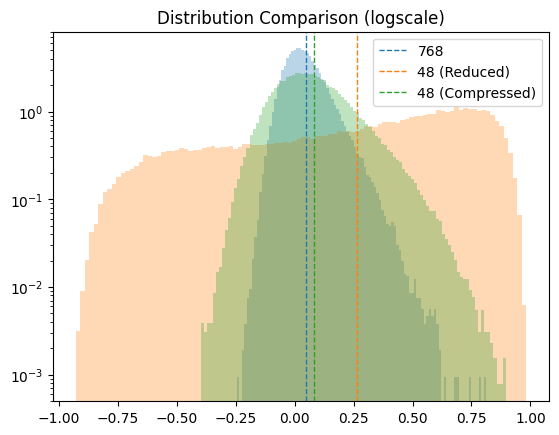

In [17]:
ax = plot_distribution(full_dist, density_color="C0", mean_color="C0", alpha=0.3)
ax = plot_distribution(reduced_mpnet_dist, density_color="C1", mean_color="C1", alpha=0.3, ax=ax)
ax = plot_distribution(compressed_mpnet_dist, density_color="C2", mean_color="C2", alpha=0.3, ax=ax)
ax.legend(["768", "48 (Reduced)", "48 (Compressed)"])
ax.set_title("Distribution Comparison (logscale)")
ax.set_yscale("log")
plt.show()

Evidently, training the reduction as a compressed model has a fairly large effect on the distribution of cosine similarities that are output by pairs of elements. Maybe I should look into combatting this through some sort of normalzation before the cosine similarities are compared in the compressed model.

## Normalization

In [18]:
import torch

def normalize(dist):
    mu = torch.mean(dist)
    std = torch.std(dist)
    return (dist - mu) / std

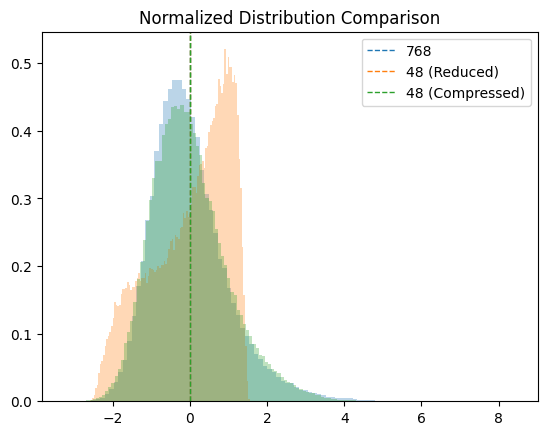

In [19]:
ax = plot_distribution(normalize(full_dist), density_color="C0", mean_color="C0", alpha=0.3)
ax = plot_distribution(normalize(reduced_mpnet_dist), density_color="C1", mean_color="C1", alpha=0.3, ax=ax)
ax = plot_distribution(normalize(compressed_mpnet_dist), density_color="C2", mean_color="C2", alpha=0.3, ax=ax)
ax.legend(["768", "48 (Reduced)", "48 (Compressed)"])
ax.set_title("Normalized Distribution Comparison")
plt.show()

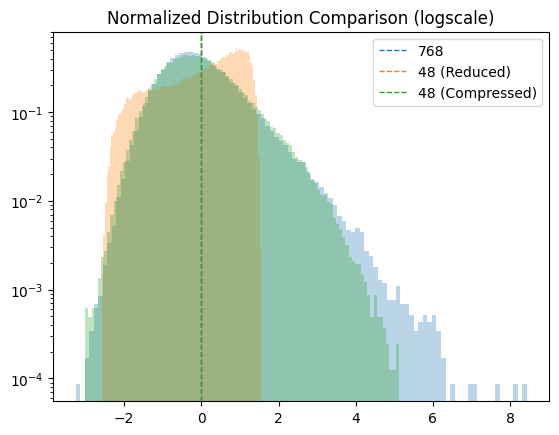

In [20]:
ax = plot_distribution(normalize(full_dist), density_color="C0", mean_color="C0", alpha=0.3)
ax = plot_distribution(normalize(reduced_mpnet_dist), density_color="C1", mean_color="C1", alpha=0.3, ax=ax)
ax = plot_distribution(normalize(compressed_mpnet_dist), density_color="C2", mean_color="C2", alpha=0.3, ax=ax)
ax.legend(["768", "48 (Reduced)", "48 (Compressed)"])
ax.set_title("Normalized Distribution Comparison (logscale)")
ax.set_yscale("log")
plt.show()